# Equidistant Subsampling – 45 Positions

This notebook presents subsampling results for nano-FTIR interferograms reconstructed using different strategies.

---

## 1. Objective

Explore the effect of sampling density and method (grid, equidistant, white-light, or random) on the reconstruction quality and SNR evaluation of nano-FTIR spectra.

## 2. Load Data

Load the relevant interferogram dataset and define reconstruction parameters.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.fftpack import fft, fftfreq, rfft, ifft, fft2
from scipy.io import loadmat
from scipy.stats import kde
from matplotlib import colors
from scipy.signal import blackman


In [2]:
spacialsmoothed1 = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_RekoCSspatialsmoothed_18.11.2020_12.14.30.mat ') 
Reko1=spacialsmoothed1["RekoCSspatialsmoothed"]
fulldata = loadmat('C:\\Users\\Barbara\\Documents\\BSc BV\\Results\\data_full_02.11.2020_14.23.48.mat ') 
data_full=fulldata["data_full"]


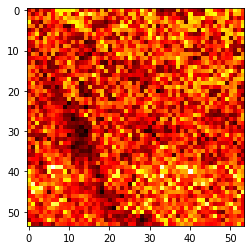

In [3]:
zweiD = np.zeros((54,54))
for i in range (0,54):
    for j in range (0,54):
        zweiD[i,j]= abs(Reko1[i,j,200])  
#print(zweiD)
plt.imshow(zweiD, cmap='hot', interpolation='none')
plt.show()
#print(datafull[1,1,0])

In [4]:
def Filter(Filtertype, Resolution): #Resolution=Length complex data
    if Filtertype==1: #blackmann-Harris-3-Term
        b=np.zeros(400*3)
        Filtered=np.zeros(400*3)
        for z in range (199):
            b[z]=np.cos(np.pi*(z)/(Resolution/2))
            Filtered [z]= 0.42323 + 0.49755*b[z] + 0.07922*np.cos(2*np.pi*(z)/(Resolution/2))  
            #b[z]=np.cos(np.pi*(z-Resolution/2))/(Resolution/2))
            #Filtered [z]= 0.42323 + 0.49755*b[z] + 0.07922*np.cos(2*np.pi*(z-Resolution/2))/(Resolution/2)) 
        for z in range (200,400):
            b[z+800]=np.cos(np.pi*(z)/(Resolution/2))
            Filtered [z+800]= 0.42323 + 0.49755*b[z+800] + 0.07922*np.cos(2*np.pi*(z+800)/(Resolution/2))  
        
        return Filtered
    if filtertype==2: #blackmann with gap
        gap = 0.4
        return blackManFn(z/Resolution, gap)

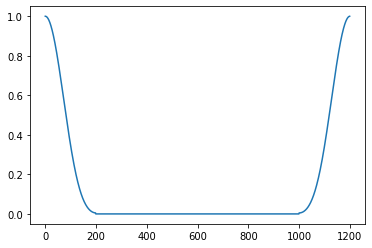

In [5]:
plt.plot(Filter(1,400))

In [6]:
def blackManFn(x, gap):
    if x >=gap and x <= (1 - gap):
        a=np.pi*((x - gap)*(0.5/(-gap + 0.5)) - 1/2)/(1/2)
        b=0.42323 + 0.49755*np.cos(a) + 0.07922*np.cos(2*a)
        return b
    if   x <=  gap or x >= 1 - gap:
        return 0.0049


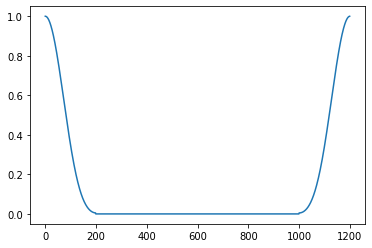

In [7]:
plt.plot(Filter(1,400))
#plt.plot( Filter(1,400*zerofilling))

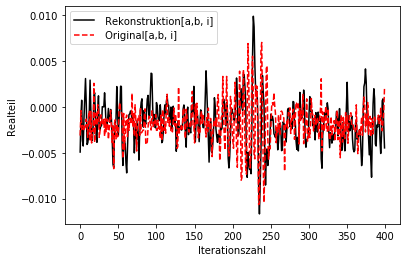

In [8]:


a=20 #good
b=13 #good

Rekonstruktion=Reko1[a,b]
phi=1.0
absolut=np.abs(10*np.exp(1j*phi)+(Rekonstruktion))
oWd=np.zeros(400)
for i in range (400):
    oWd[i]= i*(0.0008/399)*1000
    
absolut=np.abs(10*np.exp(1j*phi)+(Rekonstruktion))
I1 = np.abs(10*np.exp(1j*phi)+(Reko1[a,b]))-np.mean(absolut[0:10])
#I11 = np.abs(10*np.exp(1j*phi)+(Reko16[a,b]))-np.mean(absolut[0:10])
I2 = np.abs(10*np.exp(1j*phi)+(data_full[a,b]))-np.mean(absolut[0:10])    

plt.plot(np.real(Reko1[a,b]), 'k-',label=' Rekonstruktion[a,b, i]')
plt.plot(np.real(data_full[a,b]), 'r--',label=' Original[a,b, i]')

plt.legend()

#plt.axis([0.00115, 0.0013, 0,0.20 ])
plt.xlabel('Iterationszahl')
plt.ylabel('Realteil')

plt.show()  

In [9]:
Zerofilling, Apodisation und Fouriertransformationen mit anschließendem Plotten der Spektren aller Probenkoordinaten,

SyntaxError: invalid syntax (<ipython-input-9-cec1c660f4f3>, line 1)

Text(0, 0.5, 'abs Amplitude')

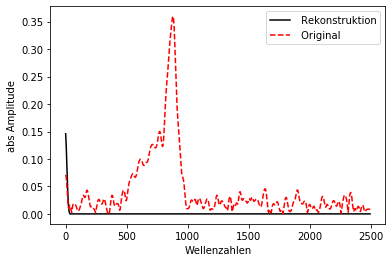

In [12]:
zerofilling=3

RekoA=np.zeros((400,),dtype = complex)
FullA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit

for i in range (0,399):
            RekoA[i]=(Reko1[a,b, i])
            FullA[i]=(data_full[a,b, i])
            

offsetReko=np.ones((400,),dtype = complex)*np.mean(RekoA[369:399,])
offReko= np.subtract(RekoA,offsetReko)

offRekozerofilling= np.concatenate([offReko,zerof])
wrapindexReko =230                                    #eventuell 299? wg mathematica
wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links

filReko = Filter(1,400)*wrapReko

ftReko = fft(filReko)
ftRekohalve1=ftReko[0:599]

offsetFull=np.ones((400,),dtype = complex)*np.mean(FullA[369:399,])
offFull= np.subtract(FullA,offsetFull)

offFullzerofilling= np.concatenate([offFull,zerof])
wrapindexFull =230                                    #eventuell 299? wg mathematica
wrapFull=np.roll(offFullzerofilling,-wrapindexFull)   # rollt nach links

filFull = Filter(1,400)*wrapFull

ftFull = fft(filFull)
ftFullhalve=ftFull[0:599]

plt.plot(wnVal[0:599,], np.absolute(ftRekohalve1),'k-',label=' Rekonstruktion')
plt.plot(wnVal[0:599,], np.absolute(ftFullhalve),'r--',label=' Original')

plt.legend()

#plt.axis([0, 2505, -0.008,0.48 ])
plt.xlabel('Wellenzahlen')
plt.ylabel('abs Amplitude')
#pos zwischen 800 und 900 wnVal

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0, 0.5, 'abs Amplitude')

<Figure size 432x288 with 0 Axes>

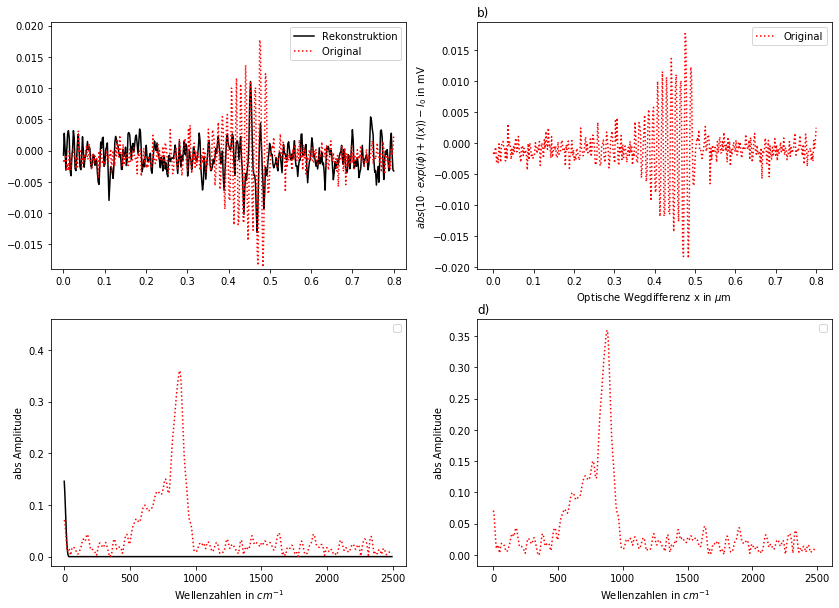

In [25]:
plt.subplots_adjust(wspace=0.5,hspace=0.5)

plt.figure(figsize=(14,10)) 

a=plt.subplot(221) 
plt.title('  ',loc='left')
#plt.plot(oWd5,subs5, 'bx',label='subsampled Points')
plt.plot(oWd,I1, 'k-',label='Rekonstruktion')
plt.plot(oWd,I2, 'r:',label='Original ')

plt.axis([-0.03, 0.83, -0.019, 0.0205])
plt.legend()
plt.xlabel(' ')
plt.ylabel('')

    

    
    

b=plt.subplot(222)
#plt.plot(oWd17,subs17, 'bx',label='subsampled Points')
#plt.plot(oWd,I11, 'k-',label='Rekonstruktion')
plt.plot(oWd,I2, 'r:',label='Original')
plt.title('b)', loc='left')
#plt.axis([0.00078, 0.001600, -0.015, 0.015])
##plt.axis([1000, 1300, -0.5, 1.4])
plt.legend()
plt.xlabel('Optische Wegdifferenz x in $\mu$m ')
plt.ylabel('$abs(10\cdot exp({i \phi})+I(x))-I_0$ in mV')

plt.subplot(223) 
#plt.title('c)', loc='left')
plt.plot(wnVal[0:599,], np.absolute(ftRekohalve1),'k-')#,label=' Rekonstruktion')
plt.plot(wnVal[0:599,], np.absolute(ftFullhalve),'r:')#,label=' Rekonstruktion')


plt.legend()

plt.axis([-100, 2600, -0.018,0.46 ])
plt.xlabel('Wellenzahlen in $cm^{-1}$')
plt.ylabel('abs Amplitude')

plt.subplot(224)
plt.title('d)', loc='left')
#plt.plot(wnVal[0:599,], np.absolute(ftRekohalve16),'k-')#,label=' Rekonstruktion')
plt.plot(wnVal[0:599,], np.absolute(ftFullhalve),'r:')#,label=' Rekonstruktion')



plt.legend()

#plt.axis([-100, 2600, -0.008,0.46])
plt.xlabel('Wellenzahlen in $cm^{-1}$')
plt.ylabel('abs Amplitude')


#plt.savefig("45 Backgroundgoodbad.pdf")

In [ ]:
Zerofilling, Apodisation und Fouriertransformationen mit anschließendem Plotten der Spektren aller Probenkoordinaten,
Plotten der zweidimensionalen Spektralen Kartierung der Hauptpeakpositionen der gesammten Probenregion und der Signal-und Hintergrundsregionen.
Berechnung des SNR-Wertes der Rekonstruktion.

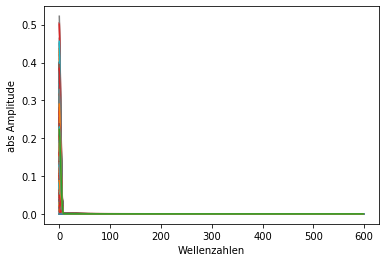

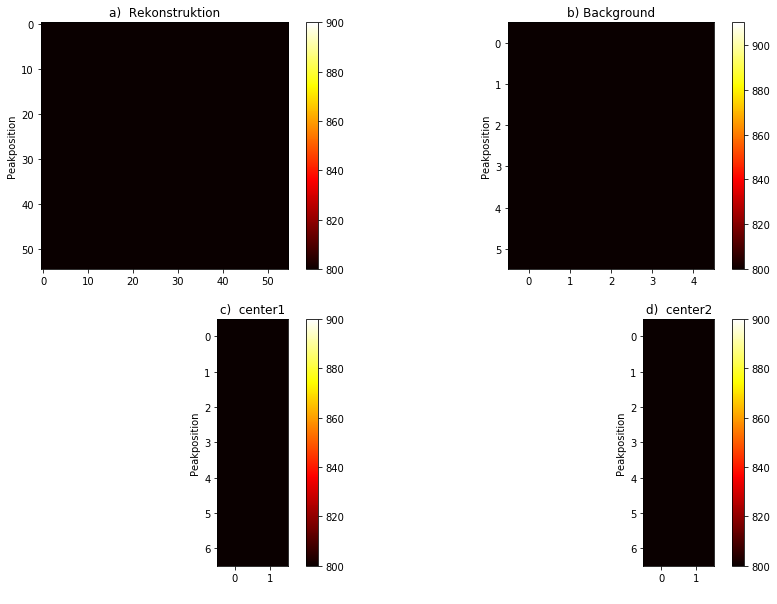

In [12]:
zerofilling=3
RekoA=np.zeros((400,),dtype = complex)
zerof=np.zeros((800,),dtype = complex)
pos_Reko_Max=np.zeros((55,55))
'''wnZFVals = 
  Table[(j - 
      1)*1/(2*(zerofilling + 1)*
       importDataScanS/10000.), {j, (zerofilling + 1)*dimDat[[2]]}];'''
wnVal= np.zeros(600)
for i in range (0, 599):
    wnVal[i]= i /(2*3*400/10000.0) # Bernd edit
    
 #x
for g in range (54):
    for h in range (54):
        for i in range (0,399):
            RekoA[i]=(Reko1[g,h, i])
        offsetReko1 = np.mean(RekoA[369:399,])               
        #print(offsetReko1)
        offsetReko=np.ones((400,),dtype = complex)*offsetReko1
        offReko= np.subtract(RekoA,offsetReko)
        #print(np.subtract(RekoA,-offsetReko)) 
        #plt.plot (np.real(offReko))
        offRekozerofilling= np.concatenate([offReko,zerof])
        #print(offRekozerofilling)
        #plt.plot (np.real(offRekozerofilling))
        wrapindexReko =230                                    
        wrapReko=np.roll(offRekozerofilling,-wrapindexReko)   # rollt nach links
        #print (wrapReko)
        #plt.plot (np.real(wrapReko))
        plt.plot(np.zeros(600))
        #filtering
        filReko = Filter(1,400)*wrapReko
        #print(filReko)
        #plt.plot(np.absolute(filReko))
        ftReko = fft(filReko)
        ftRekohalve=ftReko[0:599]
        plt.plot(np.absolute(ftRekohalve))
        pos_Reko_Max[g,h]= wnVal[np.where(np.absolute(ftRekohalve) == np.amax(np.absolute(ftRekohalve)))]
plt.plot(np.absolute(ftRekohalve))

#plt.axis([1000, 1199, -0.008,0.007 ])
plt.xlabel('Wellenzahlen')
plt.ylabel('abs Amplitude')
#pos zwischen 800 und 900 wnVal

plt.subplots_adjust(wspace=0.5,hspace=0.5)

plt.figure(figsize=(14,10))

RekoA= np.zeros((7,2))
for i in range (14,16):
    for j in range (36,43):       
        RekoA[j-36,i-14]= pos_Reko_Max[j,i]
centerReko = RekoA.flatten()


RekoA2= np.zeros((7,2))
for i in range (6,8):
    for j in range (15,22):       
        RekoA2[j-15,i-6]= pos_Reko_Max[j,i]
centerReko2 = RekoA2.flatten()



posback1Reko = np.zeros((6,5))
for i in range (17,23):
    for j in range (10,15):       
        posback1Reko[i-17, j-10] =  pos_Reko_Max[i,j]   
posback1Reko_flat = posback1Reko.flatten()


plt.subplot(221)
plt.imshow(pos_Reko_Max,vmin=800, vmax=900, cmap='hot', interpolation='none')
plt.title('a)  Rekonstruktion')
#plt.legend()
plt.xlabel(' ')
plt.ylabel('Peakposition')
plt.colorbar()

plt.subplot(222) 
plt.imshow(posback1Reko,vmin=800, vmax=910, cmap='hot', interpolation='none') #vmin=750, vmax=900
plt.title('b) Background')
#plt.legend()
plt.xlabel('')
plt.ylabel('Peakposition')
plt.colorbar()

plt.subplot(223)
plt.imshow(RekoA,vmin=800, vmax=900, cmap='hot', interpolation='none')
plt.title('c)  center1')
#plt.legend()
plt.xlabel(' ')
plt.ylabel('Peakposition')
plt.colorbar()
plt.subplot(224)
plt.imshow(RekoA2,vmin=800, vmax=900, cmap='hot', interpolation='none')
plt.title('d)  center2')
#plt.legend()
plt.xlabel(' ')
plt.ylabel('Peakposition')
plt.colorbar()
#plt.savefig("E3Indent_Peakposition.pdf")

NoiseposReko= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko,ddof=0))
SignalposReko = np.mean(posback1Reko_flat) - np.mean(centerReko)
SNRposReko = SignalposReko/NoiseposReko

NoiseposReko2= np.sqrt(np.var(posback1Reko_flat,ddof=0)+np.var(centerReko2,ddof=0))
SignalposReko2 = np.mean(posback1Reko_flat) - np.mean(centerReko2)
SNRposReko2 = SignalposReko2/NoiseposReko2

#SNR1[0]=SNRposReko
#SNR2[0]=SNRposReko2

In [13]:
print( 'center position 1' )

print (SNRposReko  )
print('is SNR of pos(max(Reko))' )
print( 'center position 2' )

print ( SNRposReko2 )
print('is SNR of pos(max(Reko))' )


center position 1
-0.20079105808130793
is SNR of pos(max(Reko))
center position 2
-0.27848628469080033
is SNR of pos(max(Reko))


## 6. Results and Conclusion

- Subsampling strategies offer significant reduction in acquisition time.
- Reconstruction quality depends on both sampling pattern and target feature size.
- Grid and equidistant sampling preserve broader structures well, while random and white-light techniques vary depending on SNR.
